# Jupyter - Day 14 - Section 002
# Lecture 14:  More K-Fold CV 

In [1]:
# Everyone's favorite standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error

# 1. Setting $k$-fold up on a slightly more complicated data set. 

Ok, let's see how we can use $k$-fold CV for determining hyperparameters. Below, we're going to generate a data set that is clearly non-linear. 

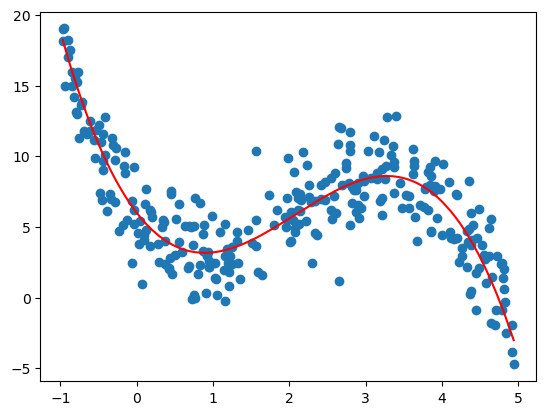

In [2]:
# Set the seed so everyone has the same numbers
np.random.seed(42)

def f(t, m1 = -7,m2 = 5, m3 = -.8, b = 6):
    return m3 * t**3 + m2*t**2 + m1*t+b

n = 300
X_toy = np.random.uniform(-1,5,n)
y_toy = f(X_toy) + np.random.normal(0,2,n)

plt.scatter(X_toy,y_toy)


# Doing this so the plot isn't ugly
X_plot = X_toy.copy()
X_plot.sort()
plt.plot(X_plot,f(X_plot),c = 'red')


X_toy = X_toy.reshape(-1,1)
y_toy = y_toy.reshape(-1,1)



To do this, we are going to set up a polynomial model. For a fixed degree $p$, we want to use the model 
$$y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \cdots+ \beta_p X^p$$

Before messing with this on our big data set, let's see how we can trick linear regression into doing our work for us. 
Take a look at my silly input data below.

&#9989; **<font color=red>Do this:</font>** Given this input data, what is each column in the following matrix?

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
X = np.array([-3,-2,-1,0, 1,2,3,4,5]).reshape(-1,1)

p = 4
poly = PolynomialFeatures(p)
X_powers = poly.fit_transform(X)

X_powers

array([[  1.,  -3.,   9., -27.,  81.],
       [  1.,  -2.,   4.,  -8.,  16.],
       [  1.,  -1.,   1.,  -1.,   1.],
       [  1.,   0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.],
       [  1.,   5.,  25., 125., 625.]])

&#9989; **<font color=red>Do this:</font>** What did I change from the above code to get the matrix below? What is different about the output matrix? 

In [5]:
p = 4
poly = PolynomialFeatures(p, include_bias=False)
X_powers = poly.fit_transform(X)

X_powers

array([[ -3.,   9., -27.,  81.],
       [ -2.,   4.,  -8.,  16.],
       [ -1.,   1.,  -1.,   1.],
       [  0.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.],
       [  5.,  25., 125., 625.]])

The trick in all this is that if I pass in this matrix to linear regression, the resulting model learned is exactly the model 
$$y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \cdots+ \beta_p X^p$$
we wanted to use earlier so long as I line up the coefficients properly. 

&#9989; **<font color=red>Do this:</font>** For the original $X_{toy}$ data set, use the `LinearRegression` class on all of the data (so no train/test splits yet) to train a polynomial model with $p=3$ to predict $y$. What is the equation of the model learned, including all the values for the coefficients? 


In [ ]:
# Your code here

&#9989; **<font color=red>Do this:</font>** Copy your code from above and modify it to use $k$-fold cross validation for $k=5$ to approximate the test error with a degree $p=3$ model. 


*Hint: You have easy-mode code from last class that involved the `cross_val_score` command that would be super useful here.*

In [ ]:
# Your code here

&#9989; **<font color=red>Do this:</font>** Using $k$-fold cross validation for $k=5$, set up code to approximate the test error for each of the polynomial models below. 
- $y = \beta_0 + \beta_1 X$
- $y = \beta_0 + \beta_1 X + \beta_2 X^2$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5$
- $y = \beta_0 + \beta_1 X+ \beta_2 X^2+ \beta_3 X^3+ \beta_4 X^4+ \beta_5 X^5+ \beta_6 X^6$

Then plot your resulting test errors for each degree. What is the best choice of polynomial for this data set? 

In [ ]:
# Your code here 

If you still have some time, try the following:
- see if you can figure out the test errors for everything through a degree 10 polynomial. 
- What happens to the graph if you mess around with the coefficients of the original polynomial that we used to generate the data set?

In [ ]:
# Your code here



-----
### Congratulations, we're done!
Initially created by Dr. Liz Munch, adapted by Dr. Mengsen Zhang, Michigan State University

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.